In [2]:
###Import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
###Specify if figures are to be saved to PNG
save_figs = False

###Color palette
archs = ['No Control', 'Upstream Repression', 'Downstream Activation', 'Dual Control']
palette = {'No Control': sns.color_palette()[3], 'Upstream Repression': 'tab:orange', 'Downstream Activation': 'tab:green', 'Dual Control': 'tab:blue', 'Initial':'black'}
palettes = {'No Control': 'Reds_r', 'Upstream Repression': 'Oranges_r', 'Downstream Activation': 'Greens_r', 'Dual Control': 'Blues_r'}

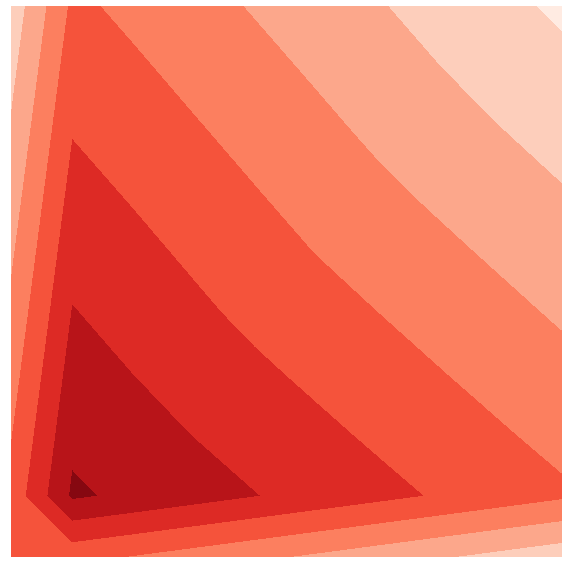

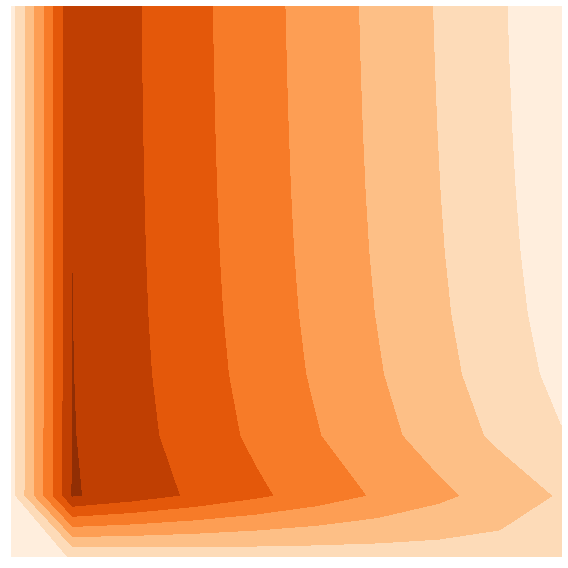

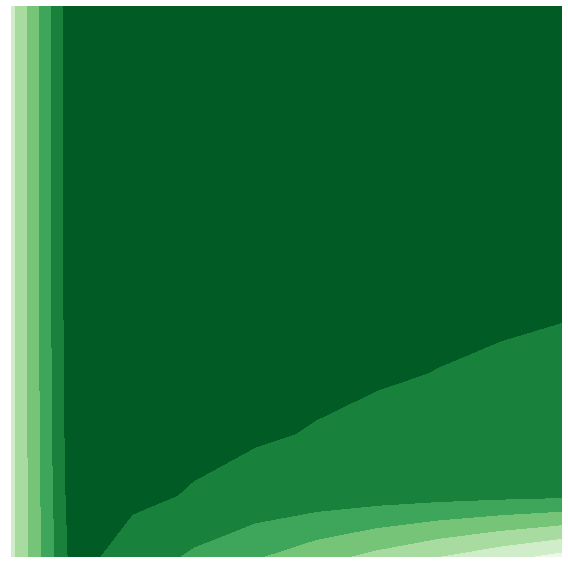

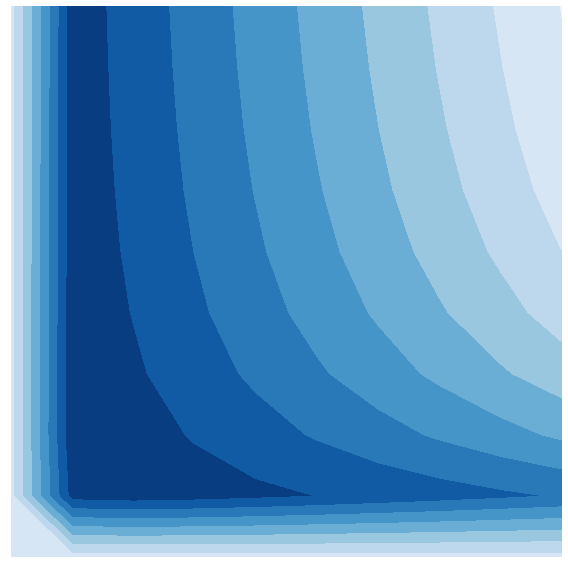

In [9]:
### FIGURE: Single landscapes for PPT postprocessing
total_background = pd.read_csv('../data/toy_model_landscapes_grid_search.csv')
total_background = total_background.loc[total_background.replicate == 1].reset_index(drop=True)
k1s = total_background.k1.unique()
k2s = total_background.k2.unique()
theta1s = total_background.theta1.unique()
theta2s = total_background.theta2.unique()

xs = ['k1', 'k1', 'k2', 'k1']
ys = ['k2', 'theta1', 'theta2', 'theta1']
xs_actual = [k1s, k1s, k2s, k1s]
ys_actual = [k2s, theta1s, theta2s, theta1s]
xs_names = ['$k_1$', '$k_1$', '$k_2$', '$k_1$']
ys_names = ['$k_2$', r'$\theta_1$', r'$\theta_2$', r'$\theta_1$']

for i in range(4):
    fig, axs = plt.subplots(1,1,figsize=(8, 8))
    landscape = total_background.loc[total_background.architecture == archs[i]]
    loss_landscape = landscape.pivot_table(index=xs[i], columns=ys[i], values='loss').T.values
    ax = axs
    contour = ax.contourf(xs_actual[i], ys_actual[i], loss_landscape, cmap=palettes[archs[i]])
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_xticks([])
    ax.set_yticks([])
    # ax.set_xlabel(xs_names[i], fontsize=44) #Include optional x and y-axis labels
    # ax.set_ylabel(ys_names[i], fontsize=44)
    for spine in ax.spines.values():
        spine.set_edgecolor(None)
    fig.tight_layout()
    if save_figs: fig.savefig('../figs/toy_model_single_landscape_'+archs[i].lower().replace(' ', '_')+'.png', dpi=300)


In [4]:
### FIGURE: Benchmarking results


,Unnamed: 0,circuit,num_samples,loss,k1_trace,k2_trace,n1_trace,n2_trace,theta1_trace,theta2_trace,time,replicate,overall_time
0,0,No Control,1000,0.904501,0.000722,0.000969,2.0,2.0,3.833524,5.886532,41.363196,1,169.57040
1,1,No Control,1000,0.423723,0.000516,0.000271,2.0,2.0,4.218217,0.091487,41.363196,1,169.57040
2,2,No Control,1000,0.220787,0.000040,0.000350,2.0,2.0,9.603531,0.677105,41.363196,1,169.57040
3,3,No Control,1000,0.823958,0.000877,0.000657,2.0,2.0,1.768518,9.914728,41.363196,1,169.57040
4,4,No Control,1000,0.638100,0.000585,0.000591,2.0,2.0,5.054543,5.524118,41.363196,1,169.57040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,995,Dual Control,1000,0.435648,0.000386,0.000716,2.0,2.0,0.030160,2.189001,42.148040,3,165.64212
11996,996,Dual Control,1000,0.440221,0.000649,0.000376,2.0,2.0,6.119355,0.705627,42.148040,3,165.64212
11997,997,Dual Control,1000,0.247417,0.000007,0.000416,2.0,2.0,5.062236,1.623581,42.148040,3,165.64212
11998,998,Dual Control,1000,0.155090,0.000180,0.000921,2.0,2.0,7.023206,4.791120,42.148040,3,165.64212
